- references
    - https://mr-easy.github.io/2020-05-21-implementing-gibbs-sampling-in-python/
    - https://www.kaggle.com/code/paujac/gibbs-sampling-for-boltzmann-distribution

In [2]:
import matplotlib.pyplot as plt

## basics

- Gibbs采样，mc的一种。参数空间维度较高时，参数的联合概率分布，直接采样效率较低，可以通过 Gibbs 轮番采样
    - 所谓的轮番采样，每一步只更新一个变量，而保持其他变量固定。
    - 这种更新依赖于条件概率分布

## 2D Gassuian case

- 已知 2d 高斯分布
  
$$
\begin{split}
\mu = \left[\mu_x,\mu_y\right]\\
\Sigma=\begin{bmatrix}
\sigma_x^2 & \sigma_{xy}\\
\sigma_{xy} & \sigma_y^2
\end{bmatrix}
\end{split}
$$

- gibbs update
    - 更新 $X$ 的条件分布时的公式为：
$$
\begin{split}
&\mu_{x|y}=\mu_x+\frac{\sigma_{xy}}{\sigma_y^2}(y-\mu_y)\\
&\sigma_{x|y}^2=\sigma_x^2-\frac{\sigma_{xy}^2}{\sigma_y^2}
\end{split}
$$
  
    - 更新 $Y$ 的条件分布时的公式为：

 $$
\begin{split}
&\mu_{y|x}=\mu_y+\frac{\sigma_{xy}}{\sigma_x^2}(x-\mu_x)\\
&\sigma_{y|x}^2=\sigma_y^2-\frac{\sigma_{xy}^2}{\sigma_x^2}
\end{split}
$$
  

In [9]:
import torch

# 参数设置
mean = torch.tensor([0.0, 1])
# 设定协方差矩阵使其具有非零的协方差项，形成椭圆形状的高斯分布
cov = torch.tensor([[1.0, 0.8], [0.8, 1.0]])
num_samples = 1000

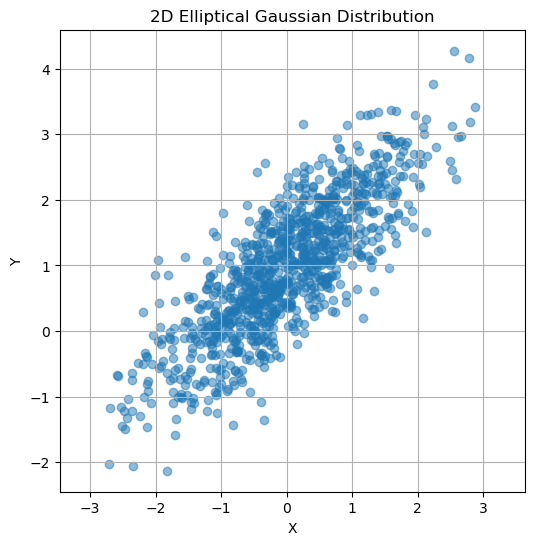

In [10]:
# 使用PyTorch的多变量正态分布生成样本
distribution = torch.distributions.MultivariateNormal(mean, cov)
samples = distribution.sample((1000,))  # 生成1000个样本

# 可视化结果
plt.figure(figsize=(6, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.title('2D Elliptical Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')  # 确保两轴的刻度一致，以真实显示椭圆形状
plt.grid(True)

In [13]:
x, y = 0, 0
samples = torch.zeros(num_samples, 2)
for i in range(num_samples):
    # 更新x
    x_cond_mean = mean[0] + cov[0, 1] / cov[1, 1] * (y - mean[1])
    x_cond_var = cov[0, 0] - cov[0, 1] ** 2 / cov[1, 1]
    x = torch.normal(x_cond_mean, x_cond_var.sqrt())

    # 更新y
    y_cond_mean = mean[1] + cov[1, 0] / cov[0, 0] * (x - mean[0])
    y_cond_var = cov[1, 1] - cov[1, 0] ** 2 / cov[0, 0]
    y = torch.normal(y_cond_mean, y_cond_var.sqrt())

    samples[i, :] = torch.tensor([x, y])

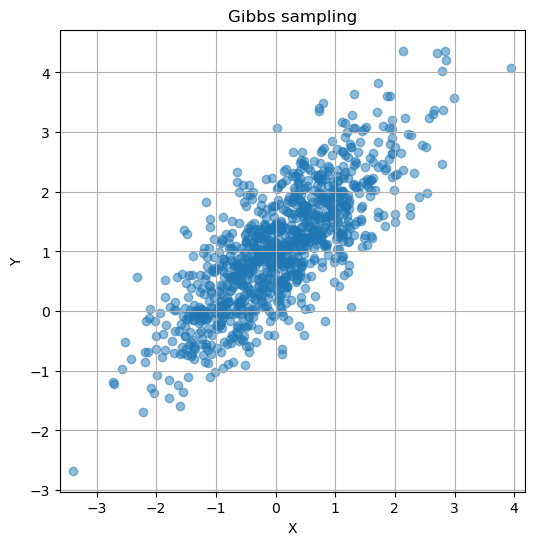

In [15]:
# 可视化结果
plt.figure(figsize=(6, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.title('Gibbs sampling')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')  # 确保两轴的刻度一致，以真实显示椭圆形状
plt.grid(True)

## 一个实际的做参数估计的例子

$$
y=ax+b+\epsilon, \quad \theta=(a,b,\epsilon)
$$